<a href="https://colab.research.google.com/github/zarrinan/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/U2_S2_D1_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
!pip install seaborn==0.9.0 -q

In [0]:
import seaborn as sns

In [0]:
#help(sns)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D


In [6]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv', index_col=0)
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 20)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df.isnull().sum()

In [0]:
# id - a notation for a house

# dateDate  - house was sold

# pricePrice  - is prediction target

# bedroomsNumber  - of Bedrooms/House

# bathroomsNumber  - of bathrooms/House

# sqft_living  - square footage of the home

# sqft_lotsquare  - footage of the lot

# floorsTotal  - floors (levels) in house

# waterfront - House which has a view to a waterfront

# view - Has been viewed

# condition - How good the condition is ( Overall )

# grade overall  - grade given to the housing unit, based on King County grading system

# sqft_abovesquare  - footage of house apart from basement

# sqft_basementsquare  - footage of the basement

# yr_built - Built Year

# yr_renovated - Year when house was renovated

# zipcode - zip

# lat - Latitude coordinate

# long - Longitude coordinate

# sqft_living15 - Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

# sqft_lot15lotSize -  area in 2015(implies-- some renovations)

Looking into dataset features above, I would want to check the number of bathrooms/ number of bedrooms ,
footage/number of bedrooms, built year - year renovated as synthetic features. Also, I would bucketize the long and lang features to see the clearer picture of the target correlation with a house' location

In [0]:
##### Your Code Here #####

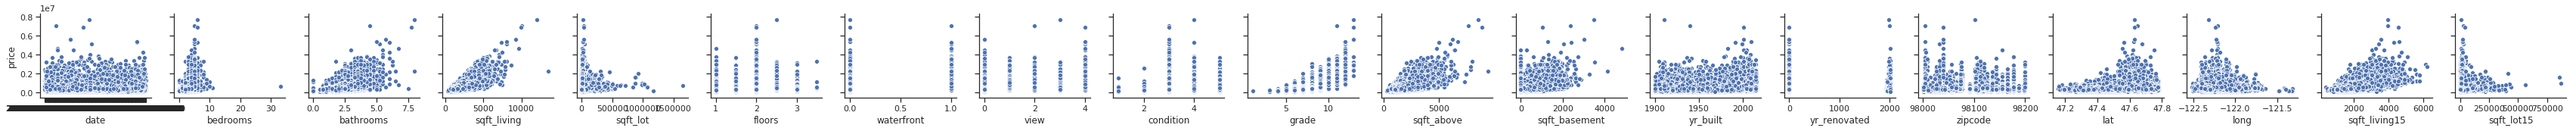

In [0]:
#To choose the feature, I would use for the one-feature linear regression model,I'll graph the features pairplot
sns.set(style='ticks', color_codes=True)
dependant_columns = df.columns.drop('price')
sns.pairplot(data=df,
             y_vars=['price'],
             x_vars=dependant_columns);

from the plots above, it seems that sqft_living has a strong correlation with the price

(21606, 1)
(21606,)
Coefficient: 
 277.58927847098306

 Intercept: 
 -38333.95016266068


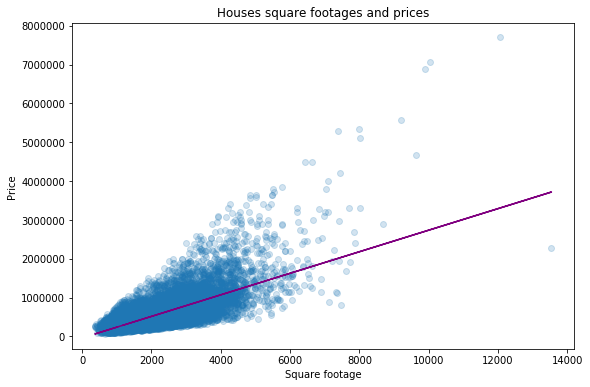

MSE is 68491293130.09467
RMSE is 261708.41241751224
R^2 is 0.49447419957768035


In [56]:
# Pick the X variable that you think will be the most correlated with Y. 
#For now, I'll pick the footage of a house
X_1 = df['sqft_living'].values[:, np.newaxis]

#the target variable is the price of a house
y_1 = df['price']

#CHeck the data shape
print(X_1.shape)
print(y_1.shape)

# Split your dataset into a 50-50 test-train-split (50% of data for training, 
#and 50% for testing).
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=.5, random_state=42 ) #random_state is to keep our samples constant 


# Train a regression model using this single X and single Y variable. Once you 
#have trained the model and obtained its coefficients, plot the points on a graph 
#and fit your line of best fit to the graph.

model_1 = LinearRegression()
model_1.fit(X_1_train, y_1_train)

print('Coefficient: \n', model_1.coef_[0])
print('\n Intercept: \n', model_1.intercept_ )


#Plotting
fig, ax = plt.subplots(figsize=(9,6))

#plot the points
ax.scatter(df['sqft_living'], df['price'], marker='o', alpha=0.2, label='Training Data')

#plot the line
m_hat = model_1.coef_[0]
b_hat = model_1.intercept_

y_hat = [m_hat*x + b_hat for x in X_1]
ax.plot(X_1, y_hat, c='purple', label='Line of Best Fit')

#Graph axes and title
ax.set_ylabel('Price')
ax.set_xlabel('Square footage')
ax.set_title('Houses square footages and prices')
plt.show()


# Report your Root Mean Squared Error and R-Squared for this model.
y_1_test_predict = model_1.predict(X_1_test)
MSE_1  = mean_squared_error(y_1_test, y_1_test_predict)
RMSE_1 = (np.sqrt(MSE_1))

R2_1 = r2_score(y_1_test, y_1_test_predict)

print('MSE is {}'.format(MSE_1))
print('RMSE is {}'.format(RMSE_1))
print('R^2 is {}'.format(R2_1))



# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [0]:
#Print regression coeficients

def print_coef_intercept(X, model):
  for i in range(0, len(model_coef_)):
    print(X.columns[i] + ':', model.coef_[i])

(21606, 2)
(21606, 1)
Slope Coefficient: 
 [-604236.57073682]

 Intercept Value: 
 [   181.28600254 100075.93843745]


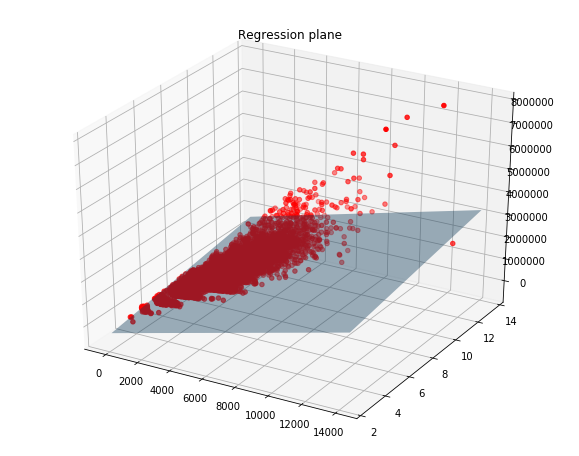

MSE is 63048139742.60307
RMSE is 251093.88631068473
R^2 is 0.5346494444486827


In [58]:

#now, I'll pick the footage of a house and grade
X_2 = df.loc[:,['sqft_living', 'grade']].values

#the target variable is the price of a house
y_2 = df.loc[:,['price']].values

#CHeck the data shape
print(X_2.shape)
print(y_2.shape)

# Split your dataset into a 50-50 test-train-split (50% of data for training, 
#and 50% for testing).
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=.5, random_state=42 ) #random_state is to keep our samples constant 


# Train a regression model using this single X and single Y variable. Once you 
#have trained the model and obtained its coefficients, plot the points on a graph 
#and fit your line of best fit to the graph.

model_2 = LinearRegression()
model_2.fit(X_2_train, y_2_train)

beta_0 = model_2.intercept_
beta_i = model_2.coef_[0]


print('Slope Coefficient: \n', beta_0)
print('\n Intercept Value: \n', beta_i)



#Plotting

fig_2 = plt.figure(figsize=(10,8))
ax_2 = fig_2.add_subplot(111, projection='3d')

# Plot points on 3D plot
ax_2.scatter(df['sqft_living'], df['grade'], df['price'], c='red')

# Set axis to size of scatter data
xl = np.array(ax_2.get_xlim())
yl = np.array(ax_2.get_ylim())
xx, yy = np.meshgrid(xl, yl)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]


#Plot plane
plt3d = plt.gca(projection='3d')


#Add opacity to plane
plt3d.plot_surface(xx,yy,zz,alpha = 0.4)
plt.title('Regression plane')
plt.show()



# Report your Root Mean Squared Error and R-Squared for this model.
y_2_test_predict = model_2.predict(X_2_test)
MSE_2  = mean_squared_error(y_2_test, y_2_test_predict)
RMSE_2 = (np.sqrt(MSE_2))

R2_2 = r2_score(y_2_test, y_2_test_predict)

print('MSE is {}'.format(MSE_2))
print('RMSE is {}'.format(RMSE_2))
print('R^2 is {}'.format(R2_2))



# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype('float64')

In [43]:
##### Your Code Here #####
y = df['price']
X = df.drop(['price', 'date', 'bath_per_bed'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)


y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

Coefficient: 
 [-4.31412320e+04  3.69683592e+04  1.14897817e+02  5.11641420e-02
  1.10977635e+04  6.76559650e+05  5.25608282e+04  2.39088383e+04
  9.63313356e+04  6.72457516e+01  4.76520660e+01 -2.57503749e+03
  2.19882659e+01 -6.15078222e+02  5.98323753e+05 -2.06112153e+05
  2.20281994e+01 -4.01720136e-01]

 Intercept:  11095326.474318575
MSE is 41502294224.756424
RMSE is 203721.11875001184
R^2 is 0.6936766770123384


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
